In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [3]:
def smooth(scalars, weight=0.9):  # TensorBoard默认平滑系数=0.9
    last = scalars[0]
    smoothed = []
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed

In [4]:
def sample(data, idx, length=10):
    start_idx = idx - length // 2
    end_idx = idx + length // 2 + 1
    if start_idx < 0:
        start_idx = 0
    if end_idx > len(data):
        end_idx = len(data)
    return np.mean(data[start_idx:end_idx]), np.std(data[start_idx:end_idx])

def mean_std_plot(data, label, color, std_scale=1, length=10):
    # plt.rcParams['font.family'] = 'SimHei'
    x = np.arange(len(data))
    means, std = [], []
    for i in range(len(data)):
        m, s = sample(data, i, length=length)
        means.append(m)
        std.append(s)
    plt.plot(x, means, label=label, color=color, linewidth=1)
    plt.fill_between(x, np.array(means) - std_scale * np.array(std), np.array(means) + std_scale * np.array(std), color=color, alpha=0.2, linewidth=0)

In [22]:
def plot_text(fp_path, idx=1, scale=1, length=10, std_scale=1, title='Mean and Std Plot', save_name=None):
    with open(fp_path, 'r') as f:
        lines = f.readlines()
    line = np.array([json.loads(lines[i][:-1]) for i in range(idx, len(lines), 2)]) * scale
    name = ['ZhuanZhou', 'DiRenJie', 'DiaoChan', 'SunWuKong', 'CaoCao']
    color = ['blue', 'green', 'red', 'orange', 'purple']
    plt.figure(figsize=(7, 5))
    for i in range(len(name)):
        mean_std_plot(line[:, i], label=name[i], color=color[i], std_scale=std_scale, length=length)
    plt.axhline(0.25, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Episode', fontdict={'fontsize': 8, 'fontweight': 'bold'})
    plt.ylabel('Weights', fontdict={'fontsize': 8, 'fontweight': 'bold'})
    plt.title(title, fontdict={'fontsize': 8, 'fontweight': 'bold'})
    # plt.xlim(0, len(line) - 1)
    # plt.ylim(0, 4)
    plt.legend()
    plt.grid(True, color='white', linestyle='-', linewidth=0.7)
    ax = plt.gca()
    ax.set_facecolor('#E0E0E0')
    plt.tight_layout()
    if save_name:
        plt.savefig(save_name, dpi=600)
    else:
        plt.show()

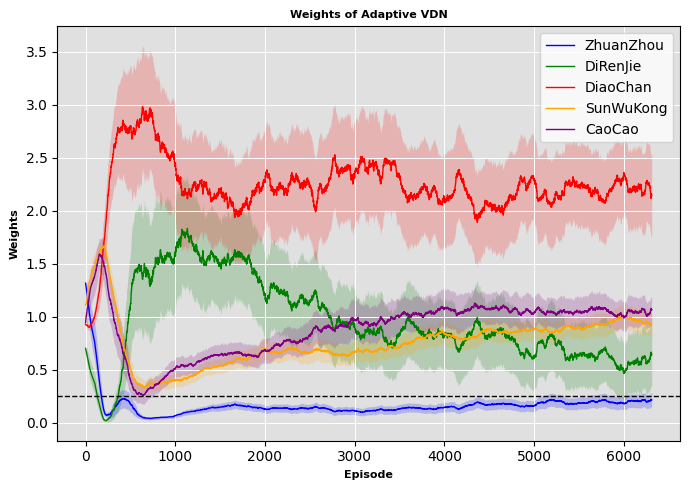

In [23]:
plot_text('weights.txt', idx=1, scale=5, std_scale=0.3, length=200, title='Weights of Adaptive VDN', save_name='weights_adaptive_vdn.png')

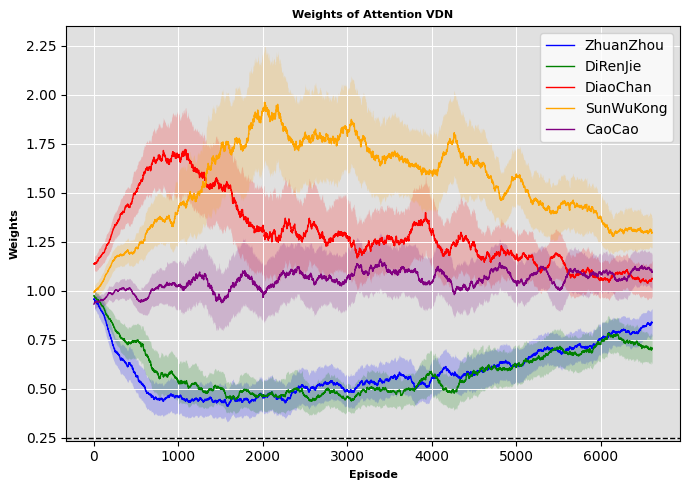

In [24]:
plot_text('attvdn_weights.txt', idx=1, scale=1, std_scale=0.3, length=200, title='Weights of Attention VDN', save_name='weights_attention_vdn.png')